# K Means

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

In [27]:
from sklearn.datasets.samples_generator import make_blobs
data = pd.read_excel('1.xls')


In [28]:
X = np.array(data.iloc[:,1:20]) 
y  = np.array(data.iloc[:,20])
X[:5]

array([[    26,      7,      3,      1,    289,     36,     13,     33,
        239554,     97,      0,      1,      2,      1,      0,      1,
            90,    172,     30],
       [     0,      7,      3,      1,    118,     13,     18,     50,
        239554,     97,      1,      1,      1,      1,      0,      0,
            98,    178,     31],
       [    23,      7,      4,      1,    179,     51,     18,     38,
        239554,     97,      0,      1,      0,      1,      0,      0,
            89,    170,     31],
       [     7,      7,      5,      1,    279,      5,     14,     39,
        239554,     97,      0,      1,      2,      1,      1,      0,
            68,    168,     24],
       [    23,      7,      5,      1,    289,     36,     13,     33,
        239554,     97,      0,      1,      2,      1,      0,      1,
            90,    172,     30]])

In [29]:
y = y.reshape(-1,1)
x = X

In [30]:
t = list(y.reshape(-1))
len(set(t))

19

### Cost function

In [31]:
def cost(x,c,mu):
    ctot = 0
    m = x.shape[0]
    for i,mu_i in enumerate(mu):
        pos = np.where(c[:,0] == i)[0]
        ctot += (np.sum((x[pos,:] - mu[i,:])**2))
    return ctot / m

### Kmeans cluster 

In [32]:
def kmeans_cluster(x, k):
    m = x.shape[0]
    c = np.zeros((m,1))
    x1 = pd.DataFrame(x)
    mu = np.array(x1.sample(frac=(k/m)).reset_index(drop=True),copy=True)
    mu
    dist = np.sum((x - mu[0,:]) ** 2,axis = 1).reshape(-1,1)
    cost_list = []
    cost_list.append(cost(x,c,mu))
    while True:
        flag = True
        for i,mu_i in enumerate(mu):
            dist1 = np.sum((x - mu_i) ** 2,axis = 1).reshape(-1,1)
            pos = np.where(dist1 < dist)[0]
            c[pos,0] = i
            dist[pos,0] = dist1[pos,0]
            if (len(pos) > 0):
                flag = False
        
        c1 = cost(x,c,mu)
        cost_list.append(c1)
        if flag:
            break
        for i,mu_i in enumerate(mu):
            pos = np.where(c[:,0] == i)[0]
            l = len(pos)
            mu[i,:] = (np.sum(x[pos,:],axis = 0) / l)
        
        
    return cost_list, c, mu

In [33]:
def kmeans(x,k):
    cost_list, c, mu = kmeans_cluster(x, k)
    for i in range(1,3):
        cost_list1, c1, mu1 = kmeans_cluster(x, k)
        if cost_list1[-1] < cost_list[-1]:
            cost_list = cost_list1
            mu = mu1
            c = c1
    return cost_list, c, mu

### Calling Kmeans cluster with k = 19

In [34]:
cost_list, c, mu = kmeans(x, 19)

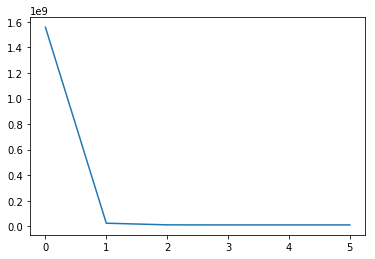

### Drawing decision boundary

In [41]:
mu[0]

array([    16,      9,      4,      2,    230,     27,     11,     36,
       267515,     93,      0,      1,      1,      0,      0,      1,
           81,    171,     27])

In [49]:
c

array([[ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [10.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 9.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
      

In [48]:
mu[4]


array([    17,      6,      3,      2,    218,     32,     13,     37,
       241950,     95,      0,      1,      1,      0,      0,      0,
           80,    171,     27])